# import data

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import os
new_directory = '/Users/zhemanzhao/Downloads'
os.chdir(new_directory)
os.getcwd()

'/Users/zhemanzhao/Downloads'

In [4]:
df = pd.read_csv('watch_reviews.tsv', sep='\t', on_bad_lines='skip')

In [5]:
df.shape

(960204, 15)

In [6]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


# clean data

In [7]:
df.isnull().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          2
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline       13
review_body          159
review_date            4
dtype: int64

In [8]:
df.shape

(960204, 15)

As we could see, there were some missing values in product_title, review_headline, review_body, review_date. Since this project was about text analysis, We would delete the data with missing values ​​in review_body

In [9]:
df.dropna(subset=['review_body'],inplace=True)

In [10]:
df.shape

(960045, 15)

In [11]:
df.reset_index(inplace=True, drop=True)

In [12]:
df['product_category'].unique()

array(['Watches'], dtype=object)

In [13]:
text_body=''.join(df['review_body'])

# plot wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [15]:
stopwords=set(STOPWORDS)
print(f"We will use {len(stopwords)} stopwords from wordcloud library")

We will use 192 stopwords from wordcloud library


In [16]:
wordcloud = WordCloud(width=900,height=900,background_color='blue',max_words=100,stopwords=stopwords,colormap='viridis',random_state=1).generate(text_body)

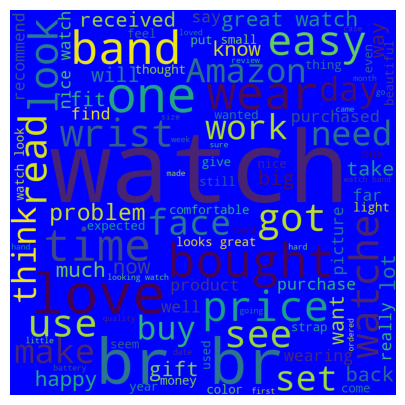

In [17]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Based on the wordcloud plot, we should adjust the wordcloud in order to get a more meaning result. We would remove those meaningless words.

In [18]:
stopwords=stopwords.union({'watch','br'})
wordcloud = WordCloud(width=900,height=900,background_color='blue',max_words=100,stopwords=stopwords,colormap='viridis',random_state=1).generate(text_body)

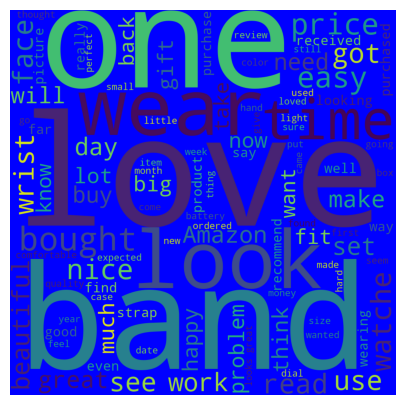

In [19]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From this wordcloud, we could see that many people mentioned that they love these watch and thought they were great. And some of them also showed their concern for the band.

## Tokenizing and Stemming

In [20]:
print(f"We use {len(stopwords)} stopwords")

We use 194 stopwords


In [21]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk import punkt

stemmer = SnowballStemmer("english")

In [22]:
def tokenizing_and_stemming(text):
    tokens = []
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())
    filtered_tokens = []
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
    stems=[stemmer.stem(t) for t in filtered_tokens]
    return stems

## TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [24]:
tfidf_model=TfidfVectorizer(max_df=0.99,min_df=0.01,stop_words='english',use_idf=True,tokenizer=tokenizing_and_stemming,ngram_range=(1,1))

In [25]:
data=df['review_body'].tolist()
tfidf_matrix = tfidf_model.fit_transform(data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'hereaft', 'herebi', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'perhap', 'pleas', 'sever', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  warnings.warn(


In [26]:
print(f"There are {tfidf_matrix.shape[0]} reviews and {tfidf_matrix.shape[1]} terms")

There are 960045 reviews and 349 terms


In [27]:
tfidf_selected_words = tfidf_model.get_feature_names_out()

## k-means clustering

In [28]:
from sklearn.cluster import KMeans
KM=KMeans(5)

In [29]:
KM.fit(tfidf_matrix)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [30]:
clusters=KM.labels_.tolist()
product={'review_body':df[:].review_body,'cluster':clusters}
frame=pd.DataFrame(product,columns=['review_body','cluster'])

In [31]:
frame.head(5)

,review_body,cluster
0,Absolutely love this watch! Get compliments al...,3
1,I love this watch it keeps time wonderfully.,3
2,Scratches,0
3,"It works well on me. However, I found cheaper ...",0
4,Beautiful watch face. The band looks nice all...,0


In [32]:
print ("Number of reviews included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,count
cluster,
0,669273
4,105533
1,75204
3,70502
2,39533


In [33]:
print ("<Document clustering result by K-means>")

order_centroids = KM.cluster_centers_.argsort()[:, ::-1]

Cluster_keywords_summary = {}
for i in range(5):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :6]: 
        Cluster_keywords_summary[i].append(tfidf_selected_words[ind])
        print (tfidf_selected_words[ind] + ",", end='')
    print ()

    cluster_reviews = frame[frame.cluster==i].review_body.tolist()
    print ("Cluster " + str(i) + " reviews_body (" + str(len(cluster_reviews)) + " reviews): ")
    print ()

<Document clustering result by K-means>
Cluster 0 words:look,time,band,work,watch,wear,
Cluster 0 reviews_body (669273 reviews): 

Cluster 1 words:nice,look,price,realli,love,good,
Cluster 1 reviews_body (75204 reviews): 

Cluster 2 words:good,product,price,look,qualiti,time,
Cluster 2 reviews_body (39533 reviews): 

Cluster 3 words:love,gift,bought,beauti,husband,wife,
Cluster 3 reviews_body (70502 reviews): 

Cluster 4 words:great,look,price,love,work,time,
Cluster 4 reviews_body (105533 reviews): 

